 # AI Community @ Семинар  № 3
 ## Введение в машинное обучение
Суть: Мы знаем какую-то характеристику объектов, надо научиться узнавать эту же характеристику для похожих объектов  
 ### Строгая формулировка
 Дано: множество объектов $O$   
 Каждый объект имеет множество определяющих переменных (known characteristics) $x \in X$ и определяемых переменных (predicted characteristics) $y \in Y$
 
 $o \in O \to (x,y)$
 
 Задача: найти функцию, наиболее точно приближающую $X \to Y$
 
 Классификация - если $Y$ конечно  
 Регрессия - если $Y = \mathbb{R} $ 
 
 ### Supervised и unsupervised learning
 Supervised - есть какой-то набор данных, для которого известны и $x$, и $y$  
 Unsupervised - $y$ неизвестно для всех данных
 
 #### Примеры:
 Superised:
 <img src="./data/Regression_Analysis_Linear.gif" alt="Drawing" style="height: 400px;"/>
 
 Unsupervised
 ![Clustering](./data/xclara-clusters-colour.png)
 
 ### Стандартная процедура для supervised learning
 1. Разбить выборку на train и test
 2. Выбрать метод
 3. Обучить его на train
 4. Посмотреть, что он предсказывает для test
 5. Сравнить с истинными значениями для test

Шаблон алгоритма:

    train_x, test_x, train_y, test_y = extract(data)
    predictor = MySuperPredictor()
    predictor.fit(train_x, train_y)
    preds = predictor.predict(test_x)
    score = compare(preds, test_y)

 ### Case study
 Распознавание рукописных цифр
 
 http://yann.lecun.com/exdb/mnist/

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import numpy as np

In [2]:
digits = datasets.load_digits()

In [6]:
def show_digit(digit):
    """
    Displays sample from MNIST in human-readable format
    
    Arguments:
    digit - numpy 1-d array of size 64
    """
    f = plt.figure(figsize=(7, 1))
    ax = f.add_subplot(111)
    ax.matshow(digit.reshape(8, 8))
    ax.axis('off')
    plt.show()

x = [  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
y = 0


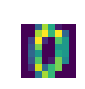

----------------------------
x = [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.   0.
   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.  16.   2.
   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.   1.  16.  16.
   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.   0.   0.   0.  11.
  16.  10.   0.   0.]
y = 1


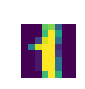

----------------------------
x = [  0.   0.   0.   4.  15.  12.   0.   0.   0.   0.   3.  16.  15.  14.   0.
   0.   0.   0.   8.  13.   8.  16.   0.   0.   0.   0.   1.   6.  15.  11.
   0.   0.   0.   1.   8.  13.  15.   1.   0.   0.   0.   9.  16.  16.   5.
   0.   0.   0.   0.   3.  13.  16.  16.  11.   5.   0.   0.   0.   0.   3.
  11.  16.   9.   0.]
y = 2


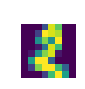

----------------------------
x = [  0.   0.   7.  15.  13.   1.   0.   0.   0.   8.  13.   6.  15.   4.   0.
   0.   0.   2.   1.  13.  13.   0.   0.   0.   0.   0.   2.  15.  11.   1.
   0.   0.   0.   0.   0.   1.  12.  12.   1.   0.   0.   0.   0.   0.   1.
  10.   8.   0.   0.   0.   8.   4.   5.  14.   9.   0.   0.   0.   7.  13.
  13.   9.   0.   0.]
y = 3


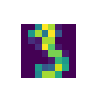

----------------------------
x = [  0.   0.   0.   1.  11.   0.   0.   0.   0.   0.   0.   7.   8.   0.   0.
   0.   0.   0.   1.  13.   6.   2.   2.   0.   0.   0.   7.  15.   0.   9.
   8.   0.   0.   5.  16.  10.   0.  16.   6.   0.   0.   4.  15.  16.  13.
  16.   1.   0.   0.   0.   0.   3.  15.  10.   0.   0.   0.   0.   0.   2.
  16.   4.   0.   0.]
y = 4


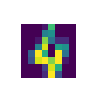

----------------------------


In [4]:
for i in range(5):
    print('x =', digits.data[i])
    print('y =', digits.target[ i])
    show_digit(digits.data[i])
    print('----------------------------')

Разделение выборки на train и test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (1437, 64)
X_test: (360, 64)
y_train: (1437,)
y_test: (360,)


 ### Линейная регрессия
  <img src="./data/Regression_Analysis_Linear.gif" alt="Drawing" style="height: 300px;"/>
  Данные аппроксимируются линией таким образом, чтобы среднее расстояние от точки до линии было наименьшим.  
  Почитать ещё: https://habrahabr.ru/company/ods/blog/323890/

In [13]:
from sklearn.linear_model import LinearRegression
predictor = LinearRegression()
predictor.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
print(y_pred)

[  8.02076372   2.56389072   0.7954459    4.85900655   4.25941905
   4.22080046   2.51945587  -0.60821469   3.21628633   6.92874562
   2.94499769   7.60539551   3.98312294   7.35248232   4.74224715
   0.02122753   4.80876786   3.58689459   2.52249078   1.92801542
   0.35735464   7.84083194  -0.82323554   7.97083825  10.34386369
   4.52438675   5.29698288   1.50273981   4.33658361   6.29001478
   4.05084828   3.80867075   5.5383291    6.74085438   2.73550092
   5.16385989   5.39075249   4.29336768   4.21206858   1.31207157
   0.1045323    4.25814729   6.35505036   3.28772323   7.15465782
   7.96682696   5.64128611   2.74953843   7.66833575   7.55876371
   7.55295691  10.39951522   1.45706096   5.72747146   7.04970305
   7.05051123   5.96516617   3.36850922   5.6309591    5.45690967
   2.03651152   5.03226505   3.32859034   7.14922667   4.86975282
   2.19846204   7.4348659    5.89723616   5.52844755   3.82150544
   6.81052424   6.37186858   8.25350863   7.83602986   4.98098587
   5.63507

Оцениваем, насколько хороши предсказания

In [14]:
from sklearn.metrics import accuracy_score
y_pred = np.round(y_pred)
accuracy_score(y_test, y_pred)

0.2388888888888889

Посмотрим пример, где предсказано правильно, и где неправильно

true: 1
predicted: 1.0


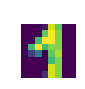

true: 7
predicted: 8.0


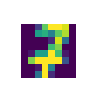

In [15]:
true_sample = X_test[y_test == y_pred][0]
print('true:', y_test[y_test == y_pred][0])
print('predicted:', y_pred[y_test == y_pred][0])
show_digit(true_sample)

false_sample = X_test[y_test != y_pred][0]
print('true:', y_test[y_test != y_pred][0])
print('predicted:', y_pred[y_test != y_pred][0])
show_digit(false_sample)

 ### Логистическая регрессия
  <img src="./data/LogReg.png" alt="Drawing" style="height: 300px;"/>
  То же самое, что и линейная регрессия, но аппроксимация ведётся не линией $y = \theta_0 + \theta_1x_1 + ... + \theta_nx_n$, а функцией $$y = \frac{1}{1+e^{-z}}$$ Где $z = \theta_0 + \theta_1x_1 + ... + \theta_nx_n$

In [16]:
from sklearn.linear_model import LogisticRegression
predictor = LogisticRegression()
predictor.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
print(y_pred)

[7 5 1 5 5 4 5 1 2 7 2 5 5 6 9 2 1 7 2 3 0 8 0 8 8 5 5 1 6 9 5 1 1 5 1 8 7
 3 3 0 0 2 9 6 7 7 5 4 1 5 8 8 4 9 7 9 3 9 6 4 2 4 4 9 5 1 7 9 6 3 5 9 8 7
 4 7 6 3 7 9 3 7 7 1 9 1 6 9 5 7 5 0 1 6 6 7 0 7 6 3 5 7 4 0 2 0 7 3 8 1 9
 0 8 9 1 8 9 8 8 9 4 3 6 6 9 9 1 1 1 8 2 4 0 1 3 7 7 9 7 9 4 6 2 8 5 3 7 9
 0 3 3 8 4 7 7 1 9 7 6 1 1 6 8 4 9 0 3 5 3 0 6 0 3 3 4 0 4 3 7 3 1 8 1 1 4
 7 3 5 8 3 9 8 4 4 9 0 4 5 5 3 4 8 3 5 5 8 7 3 2 8 6 2 8 1 0 4 7 7 2 9 7 8
 3 6 3 6 6 8 1 9 8 0 9 6 3 5 1 8 3 2 4 7 7 8 9 9 2 7 0 3 9 1 2 2 7 0 9 9 6
 8 5 5 3 6 8 9 8 4 5 4 6 3 2 8 7 5 1 8 0 4 6 6 0 4 7 2 8 9 3 3 7 1 5 4 2 7
 0 8 8 4 0 0 9 1 3 2 6 0 5 5 6 6 5 3 7 3 5 8 2 9 7 5 0 2 1 1 9 6 6 4 7 1 3
 1 0 5 7 5 9 0 4 6 5 8 5 7 6 8 6 3 8 2 2 9 4 3 0 5 0 1]


In [17]:
accuracy_score(y_test, y_pred)

0.95833333333333337

true: 7
predicted: 7


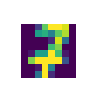

true: 8
predicted: 5


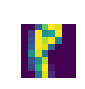

In [18]:
true_sample = X_test[y_test == y_pred][0]
print('true:', y_test[y_test == y_pred][0])
print('predicted:', y_pred[y_test == y_pred][0])
show_digit(true_sample)

false_sample = X_test[y_test != y_pred][0]
print('true:', y_test[y_test != y_pred][0])
print('predicted:', y_pred[y_test != y_pred][0])
show_digit(false_sample)

 ### k-nearest-neighbors classifier
 <img src="./data/knn_classifier.png" alt="Drawing" style="width: 300px;"/>
 Для заданной точки алгоритм ищет k ближайших к ней соседей из обучающей выборки, и возвращает класс, который встречался среди этих k точек чаще остальных.  
 Почитать ещё: https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

In [19]:
from sklearn.neighbors import KNeighborsClassifier
predictor = KNeighborsClassifier(n_neighbors=4)
predictor.fit(X_train, y_train)
y_pred = predictor.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.98611111111111116

true: 7
predicted: 7


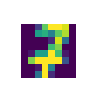

true: 8
predicted: 1


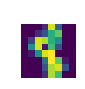

In [21]:
true_sample = X_test[y_test == y_pred][0]
print('true:', y_test[y_test == y_pred][0])
print('predicted:', y_pred[y_test == y_pred][0])
show_digit(true_sample)

false_sample = X_test[y_test != y_pred][0]
print('true:', y_test[y_test != y_pred][0])
print('predicted:', y_pred[y_test != y_pred][0])
show_digit(false_sample)

 ### Нейронная сеть
  ![LR](./data/220px-Neural_network.svg.png)
  Несколько линейных регрессий (нет), объединённых в сеть.  
  Почитать ещё: https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

In [24]:
from sklearn.neural_network import MLPClassifier 
predictor = MLPClassifier()
predictor.fit(X_train, y_train)
y_pred = predictor.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.97222222222222221

true: 7
predicted: 7


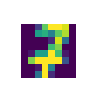

true: 8
predicted: 5


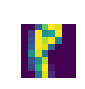

In [26]:
true_sample = X_test[y_test == y_pred][0]
print('true:', y_test[y_test == y_pred][0])
print('predicted:', y_pred[y_test == y_pred][0])
show_digit(true_sample)

false_sample = X_test[y_test != y_pred][0]
print('true:', y_test[y_test != y_pred][0])
print('predicted:', y_pred[y_test != y_pred][0])
show_digit(false_sample)

### Деревья
<img src="./data/F3.large.jpg" alt="Drawing" style="width: 500px;"/>
С помощью статистических методов строится дерево решений (или несколько деревьев). Каждый раз при предсказывании алгоритм проходит дерево от корня до одного из листов и возвращает класс, соответствующий листу.  
Почитать ещё: https://sadanand-singh.github.io/posts/treebasedmodels/

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
predictor = GradientBoostingClassifier(n_estimators=5)
predictor.fit(X_train, y_train)
y_pred = predictor.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.86111111111111116

true: 7
predicted: 7


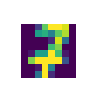

true: 4
predicted: 1


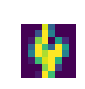

In [30]:
true_sample = X_test[y_test == y_pred][0]
print('true:', y_test[y_test == y_pred][0])
print('predicted:', y_pred[y_test == y_pred][0])
show_digit(true_sample)

false_sample = X_test[y_test != y_pred][0]
print('true:', y_test[y_test != y_pred][0])
print('predicted:', y_pred[y_test != y_pred][0])
show_digit(false_sample)

### Кластеризация (KMeans)
  <img src="./data/kmeans.png" alt="Drawing" style="height: 300px;"/>
 Алгоритм ищет K центров кластеров и относит каждую точку к тому кластеру, которому соответствует ближайший из центров.  
 При этом центры выбираются таким образом, чтобы сумма расстояний от точки до центра соответствующего ей кластера была минимальной
 Почитать ещё: https://www.datascience.com/blog/introduction-to-k-means-clustering-algorithm-learn-data-science-tutorials

In [34]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=11)
classes = clusterer.fit_predict(digits.data)

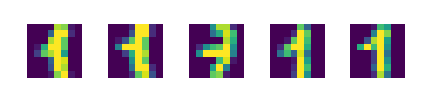

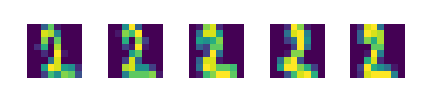

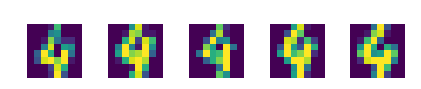

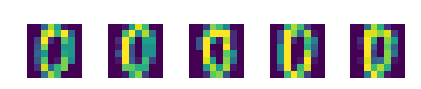

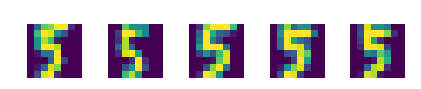

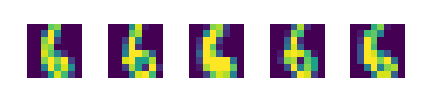

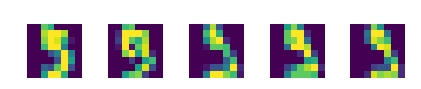

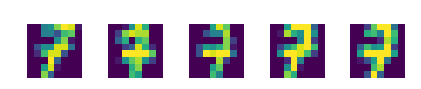

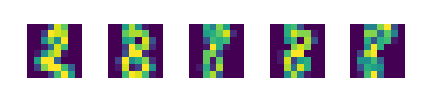

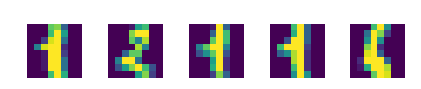

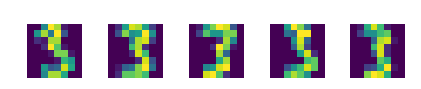

In [36]:
for i in np.unique(classes):
    f, axs = plt.subplots(1, 5, sharey=True, figsize=(7, 1))
    for i,sample in enumerate(digits.data[classes == i][:5]):
        axs[i].matshow(sample.reshape((8, 8)))
        axs[i].axis('off')
    plt.show()

Отрисуем центры кластеров

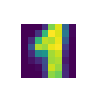

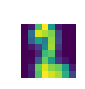

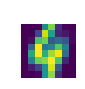

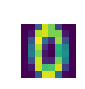

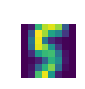

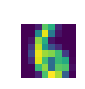

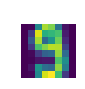

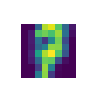

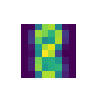

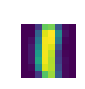

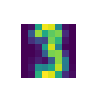

In [37]:
for center in clusterer.cluster_centers_:
    f = plt.figure(figsize=(7, 1))
    ax = f.add_subplot(111)
    ax.matshow(center.reshape(8, 8))
    ax.axis('off')
    plt.show()